In [ ]:
# This Script is to Develop TNF-alpha-specific QSAR model

# Load pIC50 data of active and inactive compounds
# Compute descriptors using RD-kit
# Normalization and model reconstruction
# Feature Importance Analysis: using SHAP values
# Save the Final model to be used in the App

#**********************
# By Ashok K. Sharma
# Date: Aug-22-2024
#**********************

In [1]:
##Load bioactivity data
#Download the curated ChEMBL bioactivity data for TNF-alpha that has been pre-processed from Parts 1 and 2.
#Here we will be using the Set1_MolecularProperties_pIC50.csv file that essentially contains the pIC50 values that we will be using for Multi-variate Statistical Analysis

import pandas as pd    
data = pd.read_csv('/Users/ashoksharma/Work/Python_bioinfo/Disease_target/output/Set1_MolecularProperties_pIC50.csv')
data

,molecule_chembl_id,canonical_smiles,class,target_name,disease_name,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL306090,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO...,active,TNF-alpha,IBD,379.457,0.46942,5.0,5.0,269.0,6.570248
1,CHEMBL72511,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](C...,active,TNF-alpha,IBD,395.456,0.16960,5.0,6.0,48.0,7.318759
2,CHEMBL76297,CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(...,active,TNF-alpha,IBD,365.430,0.16100,5.0,5.0,928.0,6.032452
3,CHEMBL11440,O=C1CCC(N2C(=O)c3c(F)c(F)c(F)c(F)c3C2=O)C(=O)N1,active,TNF-alpha,IBD,330.193,0.64420,1.0,4.0,400.0,6.397940
4,CHEMBL63,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,inactive,TNF-alpha,IBD,275.348,2.62010,1.0,3.0,12000.0,4.920819
...,...,...,...,...,...,...,...,...,...,...,...
739,CHEMBL2152944,O=C1c2ccc(Nc3ccc(F)cc3F)cc2CCc2ccc(OC[C@H](O)C...,active,TNF-alpha,IBD,425.431,3.77000,3.0,5.0,0.0,18.000000
740,CHEMBL4648362,Cc1cc2c(-c3ccco3)cnc(N[C@@H]3CCN(C)C[C@H]3C(=O...,active,TNF-alpha,IBD,463.582,3.67262,3.0,6.0,870.0,6.060481
741,CHEMBL5268975,COc1cc(/C=C2\CC/C(=C\c3ccccc3C(F)(F)F)C2=O)ccc1O,active,TNF-alpha,IBD,374.358,5.24950,1.0,3.0,629.0,6.201349
742,CHEMBL5282465,CCOC(=O)C1=C(C)NC2S/C(=C\c3ccc(N4CCOCC4)cc3)C(...,active,TNF-alpha,IBD,497.642,3.96620,1.0,8.0,890.0,6.050610


In [ ]:
# Step1: Data Preparation
# SMILES to Molecular Descriptors: 
# Convert the SMILES notation to molecular descriptors, which are numerical values representing molecular properties.
# Handling pIC50 Data: Ensure your pIC50 data is properly cleaned and normalized.

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# Load your data (assuming you have a dataframe with 'canonical_smiles' and 'pIC50' columns)
data = pd.read_csv('/Users/ashoksharma/Work/Python_bioinfo/Disease_target/output/Set1_MolecularProperties_pIC50.csv')

# Generate RDKit molecule objects from SMILES
data['mol'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)

# Select the molecular descriptors to compute
descriptor_names = [desc[0] for desc in Descriptors._descList]
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Calculate descriptors for each molecule
def calculate_descriptors(mol):
    return calculator.CalcDescriptors(mol)

data['descriptors'] = data['mol'].apply(calculate_descriptors)

# Convert the list of descriptors into a dataframe
descriptors_df = pd.DataFrame(data['descriptors'].tolist(), columns=descriptor_names)

# Combine the descriptors with the pIC50 data
qsar_data = pd.concat([descriptors_df, data['pIC50']], axis=1)

[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerator
[09:48:15] DEPRECATION WARNING: please use MorganGenerat

In [3]:
qsar_data

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,13.062936,13.062936,0.369755,-1.219433,0.347532,14.629630,379.457,350.225,379.210721,150,...,0,0,0,0,0,0,0,0,0,6.570248
1,13.101227,13.101227,0.387510,-1.260462,0.314322,14.392857,395.456,366.224,395.205636,156,...,0,0,0,0,0,0,0,0,0,7.318759
2,12.978008,12.978008,0.370537,-1.215087,0.347378,14.692308,365.430,338.214,365.195071,144,...,0,0,0,0,0,0,0,0,0,6.032452
3,13.731089,13.731089,0.205833,-2.229145,0.354556,20.869565,330.193,324.145,330.026370,120,...,0,0,0,0,0,0,0,0,0,6.397940
4,11.346455,11.346455,0.128777,0.128777,0.918549,22.850000,275.348,254.180,275.152144,108,...,0,0,0,0,0,0,0,0,0,4.920819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,13.956643,13.956643,0.074366,-0.993423,0.560478,13.741935,425.431,404.263,425.143865,160,...,0,0,0,0,0,0,0,0,0,18.000000
740,13.316006,13.316006,0.074298,-0.194956,0.533486,22.058824,463.582,430.318,463.258340,180,...,0,0,0,0,0,0,0,0,0,6.060481
741,13.129828,13.129828,0.012277,-4.475626,0.746715,17.703704,374.358,357.222,374.112979,140,...,0,0,0,0,0,0,0,0,0,6.201349
742,13.601288,13.601288,0.090320,-0.472318,0.495190,23.823529,497.642,470.426,497.144298,178,...,0,0,0,0,0,0,1,0,0,6.050610


In [ ]:
#Step2. Feature Selection (Remove this Step at the moment)
# Dimensionality Reduction: Since molecular descriptors are numerous, apply feature selection or dimensionality reduction techniques (e.g., PCA, LASSO regression) to reduce the number of variables while keeping the most informative ones.

In [5]:
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

## Standardize the data
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(qsar_data.drop(columns=['pIC50']))

## Apply PCA for dimensionality reduction
#pca = PCA(n_components=10)  # Number of components to retain
#pca_data = pca.fit_transform(scaled_data)

## Combine with pIC50 values
#final_qsar_data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(10)])
#final_qsar_data['pIC50'] = qsar_data['pIC50']

In [ ]:
#Step3. Model Development
#Machine Learning Model: Use regression models like linear regression, random forest, or more complex models like XGBoost, to predict the pIC50 values based on the molecular descriptors.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(qsar_data.drop(columns=['pIC50']))
final_qsar_data = pd.DataFrame(scaled_data)
final_qsar_data['pIC50'] = qsar_data['pIC50']

# Split the data into training and testing sets
X = final_qsar_data.drop(columns=['pIC50'])
y = final_qsar_data['pIC50']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 1.4916265540693916
R2 Score: 0.43161230776779025


In [ ]:
#Step4. Model Evaluation
#Evaluate the model using metrics like Mean Squared Error (MSE), R-squared, and cross-validation. Ensure that the model is not overfitting and generalizes well to unseen data.
#5. Interpretation
#Interpret the results, and identify the molecular features that contribute most significantly to the biological activity (pIC50).
#Techniques like SHAP (SHapley Additive exPlanations) can help in interpreting feature importance in complex models like random forests or XGBoost.

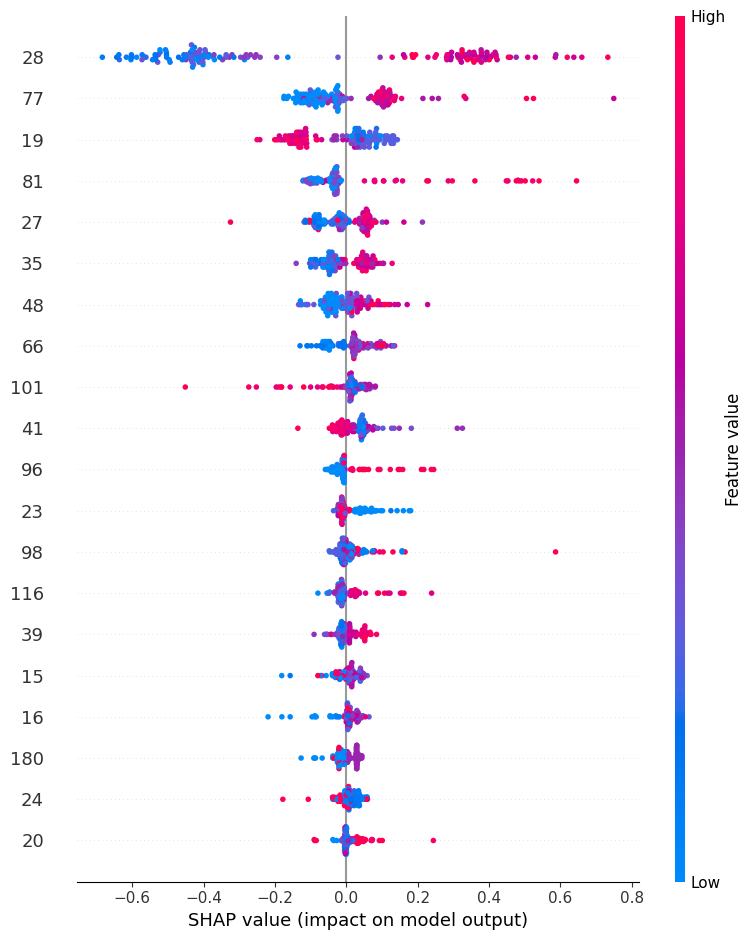

In [31]:
import shap

# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

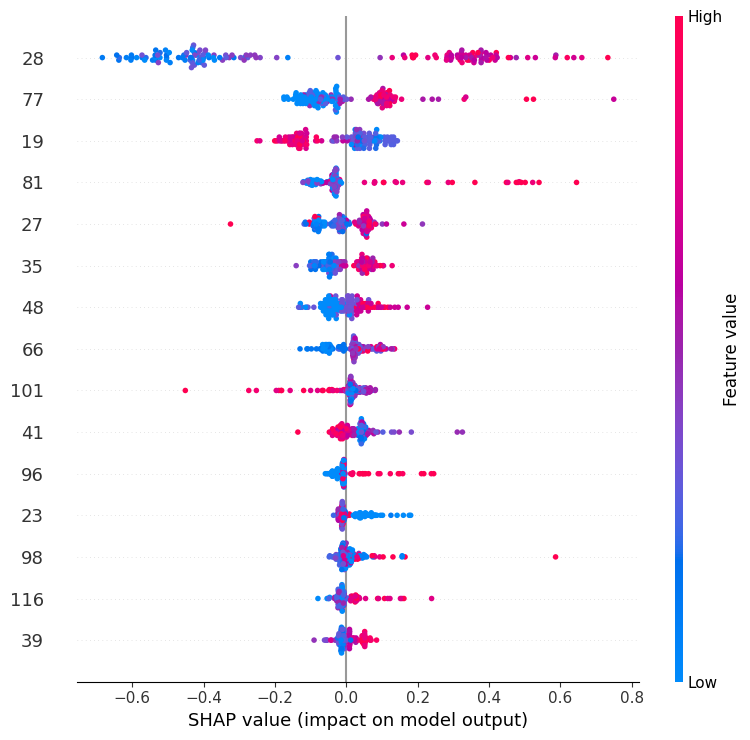

In [27]:
# Use SHAP to explain the model's predictions
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# If classification, get SHAP values for the first class (or modify for your use case)
shap_values_class = shap_values.values  # This assumes binary classification or similar

# Calculate mean absolute SHAP values for each feature
shap_mean_abs = np.mean(np.abs(shap_values_class), axis=0)
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': shap_mean_abs})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Select top 10-20 features
top_n = 15  # Change this to 10 or 20 as needed
top_features = feature_importance.head(top_n)['Feature'].tolist()

# Filter SHAP values and X_test for top features
top_feature_indices = [X_test.columns.get_loc(feature) for feature in top_features]
shap_values_top = shap_values[:, top_feature_indices]
X_test_top = X_test[top_features]

# Plot feature importance for top features
shap.summary_plot(shap_values_top, X_test_top, feature_names=top_features)

In [ ]:
#Summary of the Workflow:
#Convert SMILES to Descriptors: Use RDKit to calculate molecular descriptors from SMILES notations.
#Data Preprocessing: Clean and preprocess the data, handling missing values and normalizing features.
#Dimensionality Reduction: Apply feature selection or dimensionality reduction to keep the most informative features.
#Model Building: Train machine learning models (e.g., Random Forest, XGBoost) using molecular descriptors as features and pIC50 as the target.
#Model Evaluation: Validate the model using appropriate metrics and ensure it generalizes to unseen data.
#Interpretation: Use interpretability techniques to understand which molecular features are driving predictions.
#This general approach will help you build a robust QSAR model using SMILES and pIC50 data. Let me know if you need help with any specific step!

In [ ]:
#1. Model Diagnostics and Visualization
#Visualizing model diagnostics can help identify potential improvements. Here are some plots you can use:

#Residual Plot
#A residual plot can help determine if the model fits well and if there are patterns in the residuals, which would indicate non-linear relationships that your model isn't capturing.
#Code Example:

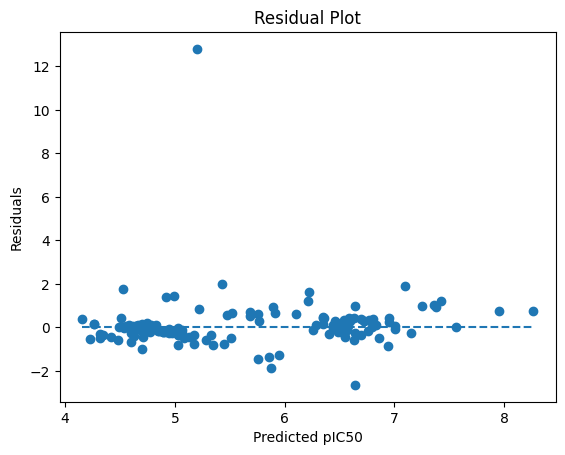

In [9]:
import matplotlib.pyplot as plt

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), linestyles='dashed')
plt.xlabel('Predicted pIC50')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

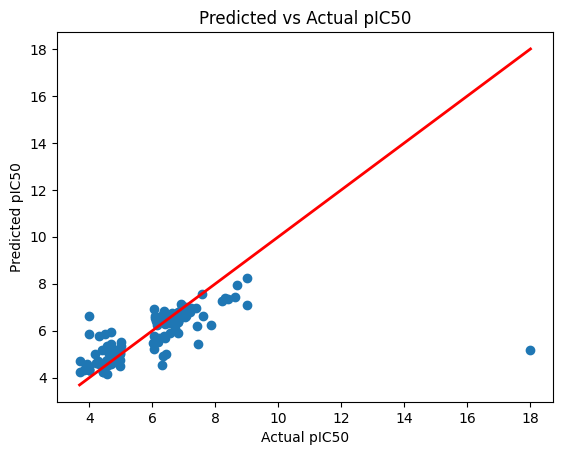

In [10]:
#Prediction vs. Actual Plot
#This plot helps you visualize how well your model predictions align with the actual pIC50 values.

# Plot predicted vs actual pIC50 values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Predicted vs Actual pIC50')
plt.show()

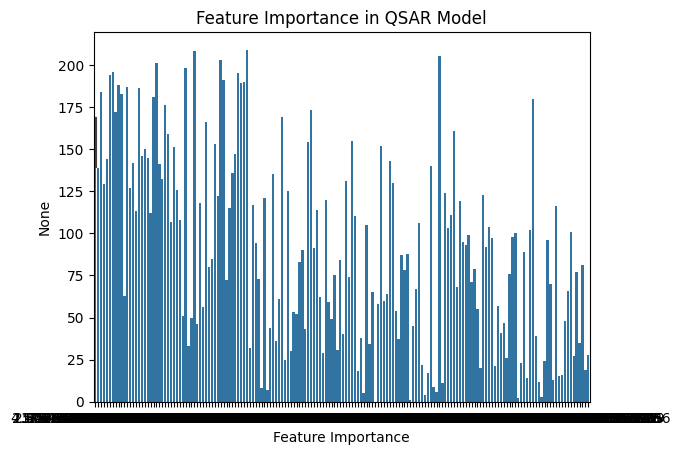

In [11]:
#Feature Importance Plot
#This plot helps you understand which features (descriptors) are contributing the most to your model's predictions.

import seaborn as sns

# Plot feature importance for Random Forest
importance = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importance, y=feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in QSAR Model')
plt.show()

/var/folders/1y/v_q31vjn0cscx8r6cgykns140000gp/T/ipykernel_51411/1995769581.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Feature', y='Importance', data=top_features_df, palette='viridis')


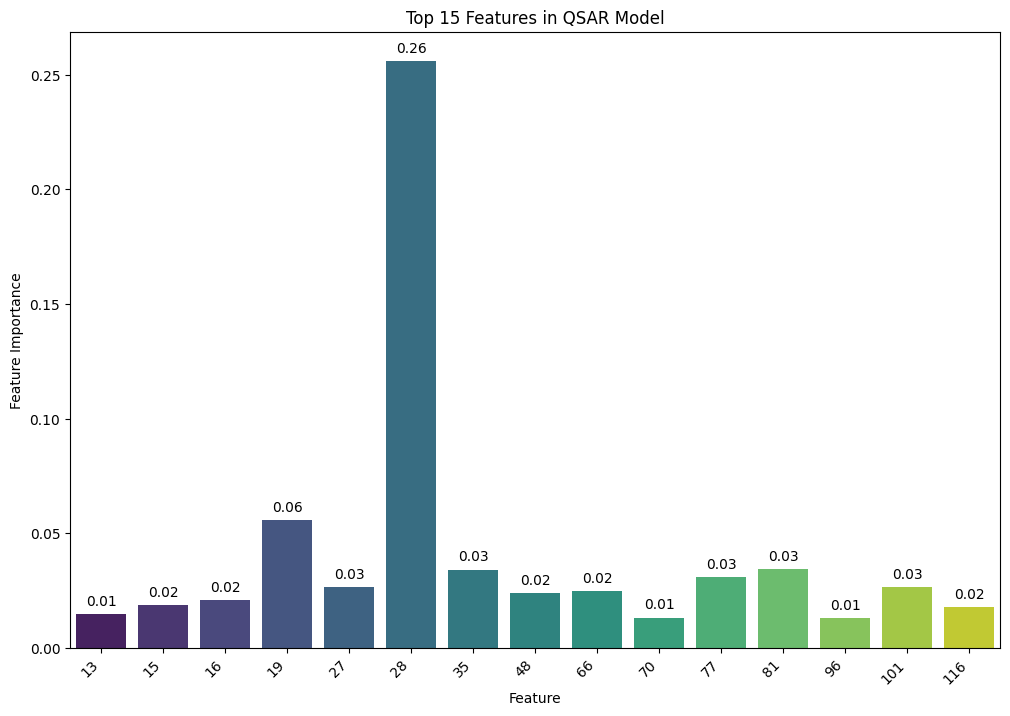

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your model and X are already defined and fitted
importance = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort features by importance and select top 10-20
top_n = 15  # Change this to 10 or 20 as needed
top_features_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot feature importance using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Feature', y='Importance', data=top_features_df, palette='viridis')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center',
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title(f'Top {top_n} Features in QSAR Model')
plt.show()

In [ ]:
#2. Improve Model Performance
#There are various strategies you can employ to improve the model:

#Hyperparameter Tuning
#Using grid search or random search to find the optimal hyperparameters for your model can lead to better performance.

#Code Example:

In [12]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

In [13]:
best_model

RandomForestRegressor(max_depth=20, n_estimators=300)

In [20]:
# Save the best model
import pickle

# Save the model to a file
with open('/Users/ashoksharma/Work/Python_bioinfo/Disease_target/models/TNFalpha_QSAR_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [17]:
## Try different Models
##!pip3 install xgboost
#import xgboost as xgb

## Initialize XGBoost regressor
#xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6)
#xgboost_model.fit(X_train, y_train)

## Make predictions and evaluate
#y_pred_xgb = xgboost_model.predict(X_test)
#print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
#print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))

In [14]:
# Load your data (assuming you have a dataframe with 'canonical_smiles' and 'pIC50' columns)
external_data = pd.read_csv('/Users/ashoksharma/Work/Python_bioinfo/Disease_target/output/externaldata_pIC50.csv')
external_data = external_data.iloc[:4]
external_data

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879


In [16]:
# Assuming 'external_data' contains the SMILES for external validation compounds
external_data['mol'] = external_data['canonical_smiles'].apply(Chem.MolFromSmiles)
external_data['descriptors'] = external_data['mol'].apply(calculate_descriptors)

# Convert descriptors to DataFrame
external_descriptors_df = pd.DataFrame(external_data['descriptors'].tolist(), columns=descriptor_names)

# Make predictions using the trained model
external_predictions = best_model.predict(external_descriptors_df)

# Print or save the predicted pIC50 values for the external dataset
external_data['predicted_pIC50'] = external_predictions
print(external_data[['canonical_smiles', 'predicted_pIC50']])

                                    canonical_smiles  predicted_pIC50
0              CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1         5.832146
1         O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1         7.389494
2  CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1         7.408667
3      O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F         7.333236


[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
[10:13:34] DEPRECATION WARNING: please use MorganGenerator
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


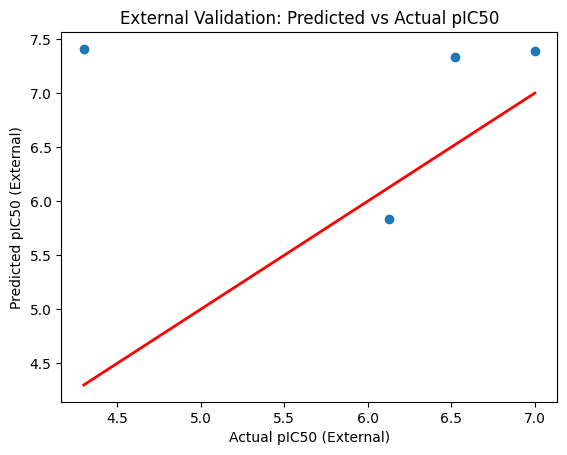

In [18]:
import matplotlib.pyplot as plt

# Assuming external_df is your DataFrame and 'external_pIC50' is the column name
external_pIC50 = external_data['pIC50']

# Assuming external_predictions contains the predicted pIC50 values
plt.scatter(external_pIC50, external_predictions)

# Plot the ideal diagonal line
plt.plot([min(external_pIC50), max(external_pIC50)], [min(external_pIC50), max(external_pIC50)], color='red', lw=2)

# Add labels and title
plt.xlabel('Actual pIC50 (External)')
plt.ylabel('Predicted pIC50 (External)')
plt.title('External Validation: Predicted vs Actual pIC50')

# Display the plot
plt.show()

In [ ]:
# Save the best model in PKL format to be used on External dataset in Future


In [19]:
external_descriptors_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.818917,11.818917,0.048049,-0.603093,0.699960,10.478261,312.325,296.197,312.111007,118,...,0,0,0,0,0,0,0,0,0,0
1,12.931567,12.931567,0.050268,-0.050268,0.734047,17.720000,376.913,355.745,376.112460,132,...,1,0,0,0,0,0,0,0,0,0
2,12.859892,12.859892,0.135327,-4.406486,0.527034,11.464286,426.851,412.739,426.052894,146,...,1,0,0,0,0,0,0,0,0,0
3,12.714518,12.714518,0.066807,-4.365026,0.695219,15.307692,404.845,388.717,404.068544,140,...,1,0,0,0,0,0,0,0,0,0
